In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
not_hot_songs = pd.read_csv("not_hot_songs_audio_features.csv")
hot_songs = pd.read_csv("hot_songs_audio_features.csv")

In [32]:
not_hot_songs.drop(columns = 'Unnamed: 0', inplace = True)
hot_songs.drop(columns = 'Unnamed: 0', inplace = True)

In [33]:
not_hot_songs['dataset']= 'not_hot'

In [34]:
hot_songs['dataset']= 'hot'

## cleaning dataframe

In [35]:
hot_songs.isnull().sum()/len(not_hot_songs)

artist              0.0
title               0.0
id                  0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
type                0.0
uri                 0.0
track_href          0.0
analysis_url        0.0
duration_ms         0.0
time_signature      0.0
dataset             0.0
dtype: float64

In [36]:
not_hot_songs.isnull().sum()/len(not_hot_songs)

artist              0.000000
title               0.000000
id                  0.000000
danceability        0.018083
energy              0.018083
key                 0.018083
loudness            0.018083
mode                0.018083
speechiness         0.018083
acousticness        0.018083
instrumentalness    0.018083
liveness            0.018083
valence             0.018083
tempo               0.018083
type                0.018083
uri                 0.018083
track_href          0.018083
analysis_url        0.018083
duration_ms         0.018083
time_signature      0.018083
dataset             0.000000
dtype: float64

In [37]:
list_of_row_index = not_hot_songs[not_hot_songs['energy'].isna() ==True].index.tolist()
not_hot_songs = not_hot_songs.drop(list_of_row_index,axis=0)

## concat Dataframe

In [38]:
full_df = pd.concat([hot_songs,not_hot_songs],axis=0)

In [39]:
url=[]

for i in full_df['id'].values:
    track_url = "https://open.spotify.com/track/"+str(i)
    url.append(track_url)
full_df['track_link'] = url


In [50]:
full_df

,artist,title,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,dataset,track_link
0,Brenda Lee,Rockin' Around The Christmas Tree,2EjXfH91m7f8HiJN1yQg97,0.589,0.472,8.0,-8.749,1.0,0.0502,0.61400,...,0.898,67.196,audio_features,spotify:track:2EjXfH91m7f8HiJN1yQg97,https://api.spotify.com/v1/tracks/2EjXfH91m7f8...,https://api.spotify.com/v1/audio-analysis/2EjX...,126267.0,4.0,hot,https://open.spotify.com/track/2EjXfH91m7f8HiJ...
1,Mariah Carey,All I Want For Christmas Is You,0bYg9bo50gSsH3LtXe2SQn,0.336,0.627,7.0,-7.463,1.0,0.0384,0.16400,...,0.350,150.273,audio_features,spotify:track:0bYg9bo50gSsH3LtXe2SQn,https://api.spotify.com/v1/tracks/0bYg9bo50gSs...,https://api.spotify.com/v1/audio-analysis/0bYg...,241107.0,4.0,hot,https://open.spotify.com/track/0bYg9bo50gSsH3L...
2,Bobby Helms,Jingle Bell Rock,7vQbuQcyTflfCIOu3Uzzya,0.754,0.424,2.0,-8.463,1.0,0.0363,0.64300,...,0.806,119.705,audio_features,spotify:track:7vQbuQcyTflfCIOu3Uzzya,https://api.spotify.com/v1/tracks/7vQbuQcyTflf...,https://api.spotify.com/v1/audio-analysis/7vQb...,130973.0,4.0,hot,https://open.spotify.com/track/7vQbuQcyTflfCIO...
3,Wham!,Last Christmas,2FRnf9qhLbvw8fu4IBXx78,0.735,0.478,2.0,-12.472,1.0,0.0293,0.18900,...,0.947,107.682,audio_features,spotify:track:2FRnf9qhLbvw8fu4IBXx78,https://api.spotify.com/v1/tracks/2FRnf9qhLbvw...,https://api.spotify.com/v1/audio-analysis/2FRn...,262960.0,4.0,hot,https://open.spotify.com/track/2FRnf9qhLbvw8fu...
4,Burl Ives,A Holly Jolly Christmas,77khP2fIVhSW23NwxrRluh,0.683,0.375,0.0,-13.056,1.0,0.0303,0.57900,...,0.888,140.467,audio_features,spotify:track:77khP2fIVhSW23NwxrRluh,https://api.spotify.com/v1/tracks/77khP2fIVhSW...,https://api.spotify.com/v1/audio-analysis/77kh...,135533.0,4.0,hot,https://open.spotify.com/track/77khP2fIVhSW23N...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,Black Box Recorder,The Facts of Life,4eappNAqv5JsqWN1LJqpfY,0.619,0.508,8.0,-10.014,1.0,0.0332,0.00151,...,0.235,139.012,audio_features,spotify:track:4eappNAqv5JsqWN1LJqpfY,https://api.spotify.com/v1/tracks/4eappNAqv5Js...,https://api.spotify.com/v1/audio-analysis/4eap...,191333.0,4.0,not_hot,https://open.spotify.com/track/4eappNAqv5JsqWN...
2761,Bob Dylan,Just Like Tom Thumb's Blues,0V1771LhL3tG36pb55EZAH,0.497,0.511,7.0,-8.318,1.0,0.0271,0.70200,...,0.591,99.500,audio_features,spotify:track:0V1771LhL3tG36pb55EZAH,https://api.spotify.com/v1/tracks/0V1771LhL3tG...,https://api.spotify.com/v1/audio-analysis/0V17...,327560.0,4.0,not_hot,https://open.spotify.com/track/0V1771LhL3tG36p...
2762,Sebadoh,On Fire,091SOmej015R3W0pUkc05v,0.489,0.588,7.0,-6.601,1.0,0.0279,0.02690,...,0.218,106.905,audio_features,spotify:track:091SOmej015R3W0pUkc05v,https://api.spotify.com/v1/tracks/091SOmej015R...,https://api.spotify.com/v1/audio-analysis/091S...,216067.0,4.0,not_hot,https://open.spotify.com/track/091SOmej015R3W0...
2763,Phoenix,Long Distance Call,7dGubYmPavaI9YNansq9TW,0.752,0.496,0.0,-5.498,1.0,0.0446,0.02020,...,0.677,104.949,audio_features,spotify:track:7dGubYmPavaI9YNansq9TW,https://api.spotify.com/v1/tracks/7dGubYmPavaI...,https://api.spotify.com/v1/audio-analysis/7dGu...,186160.0,4.0,not_hot,https://open.spotify.com/track/7dGubYmPavaI9YN...


In [52]:
def lower_values(value:str):
    new_value = value.lower()
    return new_value

In [53]:
full_df['artist'] = full_df['artist'].apply(lower_values)
full_df['title'] = full_df['title'].apply(lower_values)

In [54]:
full_df

,artist,title,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,dataset,track_link
0,brenda lee,rockin' around the christmas tree,2EjXfH91m7f8HiJN1yQg97,0.589,0.472,8.0,-8.749,1.0,0.0502,0.61400,...,0.898,67.196,audio_features,spotify:track:2EjXfH91m7f8HiJN1yQg97,https://api.spotify.com/v1/tracks/2EjXfH91m7f8...,https://api.spotify.com/v1/audio-analysis/2EjX...,126267.0,4.0,hot,https://open.spotify.com/track/2EjXfH91m7f8HiJ...
1,mariah carey,all i want for christmas is you,0bYg9bo50gSsH3LtXe2SQn,0.336,0.627,7.0,-7.463,1.0,0.0384,0.16400,...,0.350,150.273,audio_features,spotify:track:0bYg9bo50gSsH3LtXe2SQn,https://api.spotify.com/v1/tracks/0bYg9bo50gSs...,https://api.spotify.com/v1/audio-analysis/0bYg...,241107.0,4.0,hot,https://open.spotify.com/track/0bYg9bo50gSsH3L...
2,bobby helms,jingle bell rock,7vQbuQcyTflfCIOu3Uzzya,0.754,0.424,2.0,-8.463,1.0,0.0363,0.64300,...,0.806,119.705,audio_features,spotify:track:7vQbuQcyTflfCIOu3Uzzya,https://api.spotify.com/v1/tracks/7vQbuQcyTflf...,https://api.spotify.com/v1/audio-analysis/7vQb...,130973.0,4.0,hot,https://open.spotify.com/track/7vQbuQcyTflfCIO...
3,wham!,last christmas,2FRnf9qhLbvw8fu4IBXx78,0.735,0.478,2.0,-12.472,1.0,0.0293,0.18900,...,0.947,107.682,audio_features,spotify:track:2FRnf9qhLbvw8fu4IBXx78,https://api.spotify.com/v1/tracks/2FRnf9qhLbvw...,https://api.spotify.com/v1/audio-analysis/2FRn...,262960.0,4.0,hot,https://open.spotify.com/track/2FRnf9qhLbvw8fu...
4,burl ives,a holly jolly christmas,77khP2fIVhSW23NwxrRluh,0.683,0.375,0.0,-13.056,1.0,0.0303,0.57900,...,0.888,140.467,audio_features,spotify:track:77khP2fIVhSW23NwxrRluh,https://api.spotify.com/v1/tracks/77khP2fIVhSW...,https://api.spotify.com/v1/audio-analysis/77kh...,135533.0,4.0,hot,https://open.spotify.com/track/77khP2fIVhSW23N...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,black box recorder,the facts of life,4eappNAqv5JsqWN1LJqpfY,0.619,0.508,8.0,-10.014,1.0,0.0332,0.00151,...,0.235,139.012,audio_features,spotify:track:4eappNAqv5JsqWN1LJqpfY,https://api.spotify.com/v1/tracks/4eappNAqv5Js...,https://api.spotify.com/v1/audio-analysis/4eap...,191333.0,4.0,not_hot,https://open.spotify.com/track/4eappNAqv5JsqWN...
2761,bob dylan,just like tom thumb's blues,0V1771LhL3tG36pb55EZAH,0.497,0.511,7.0,-8.318,1.0,0.0271,0.70200,...,0.591,99.500,audio_features,spotify:track:0V1771LhL3tG36pb55EZAH,https://api.spotify.com/v1/tracks/0V1771LhL3tG...,https://api.spotify.com/v1/audio-analysis/0V17...,327560.0,4.0,not_hot,https://open.spotify.com/track/0V1771LhL3tG36p...
2762,sebadoh,on fire,091SOmej015R3W0pUkc05v,0.489,0.588,7.0,-6.601,1.0,0.0279,0.02690,...,0.218,106.905,audio_features,spotify:track:091SOmej015R3W0pUkc05v,https://api.spotify.com/v1/tracks/091SOmej015R...,https://api.spotify.com/v1/audio-analysis/091S...,216067.0,4.0,not_hot,https://open.spotify.com/track/091SOmej015R3W0...
2763,phoenix,long distance call,7dGubYmPavaI9YNansq9TW,0.752,0.496,0.0,-5.498,1.0,0.0446,0.02020,...,0.677,104.949,audio_features,spotify:track:7dGubYmPavaI9YNansq9TW,https://api.spotify.com/v1/tracks/7dGubYmPavaI...,https://api.spotify.com/v1/audio-analysis/7dGu...,186160.0,4.0,not_hot,https://open.spotify.com/track/7dGubYmPavaI9YN...


In [55]:
full_df.to_csv("full_df.csv")

In [41]:
full_df_num= full_df.select_dtypes(np.number)

In [42]:
full_df_num.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.589,0.472,8.0,-8.749,1.0,0.0502,0.614,0.000000,0.5050,0.898,67.196,126267.0,4.0
1,0.336,0.627,7.0,-7.463,1.0,0.0384,0.164,0.000000,0.0708,0.350,150.273,241107.0,4.0
2,0.754,0.424,2.0,-8.463,1.0,0.0363,0.643,0.000000,0.0652,0.806,119.705,130973.0,4.0
3,0.735,0.478,2.0,-12.472,1.0,0.0293,0.189,0.000002,0.3550,0.947,107.682,262960.0,4.0
4,0.683,0.375,0.0,-13.056,1.0,0.0303,0.579,0.000000,0.0760,0.888,140.467,135533.0,4.0


## Scale, UMAP and HDBSCAN in one function

In [43]:
from umap import UMAP
import seaborn as sns
import colorcet as cc
from sklearn.datasets import make_classification
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from kneed import KneeLocator
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import time
import pickle
from dbcv import *


def creating_cluster(df:pd.DataFrame, eps:float, min_cluster_size:int):
    
    #Scaling
    scaler = StandardScaler()
    scaler.fit(df)
    X_scaled = scaler.transform(df)
    filename = "scaler.pickle" # Path with filename

    with open(filename, "wb") as file:
        pickle.dump(scaler,file)

    X_scaled_df = pd.DataFrame(X_scaled, columns = df.columns)
    
    #UMAP
    reducer = UMAP(n_components=2,random_state=42)
    reducer.fit(X_scaled_df)
    X_umap_transformed = reducer.transform(X_scaled_df)
    X_umap_transformed_df = pd.DataFrame(X_umap_transformed, columns=["UMAP_1","UMAP_2"])
    
    #HDBSCAN
    
    # Creating the clustering model
    model = HDBSCAN(cluster_selection_epsilon=eps, min_cluster_size=min_cluster_size) # Default values are: eps=0.5, min_samples=5
    # fit model and predict clusters
    yhat = model.fit_predict(X_umap_transformed_df) # .fit(X_scaled_df)

    file = "hdbscan.pickle"

    with open(file, "wb") as file:
        pickle.dump(model, file)
    
    X_umap_transformed_df["cluster"] = yhat
    
    fig, ax = plt.subplots()
    custom_palette = sns.color_palette(cc.glasbey, n_colors=yhat.size)
    custom_palette = [color if yhat != -1 else (0.,0.,0.) for yhat, color in zip(yhat,custom_palette)]
    sns.scatterplot(X_umap_transformed_df, x="UMAP_1", y="UMAP_2", hue="cluster", palette=custom_palette, legend="auto")
    plt.show()
    
    return [X_scaled_df, X_umap_transformed_df]
    

/Users/simonefischer/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/var/folders/yk/s4qyg63s1hq80x6c4rqfc6100000gn/T/ipykernel_95066/3734149671.py:54: UserWarning:

The palette list has more values (2799) than needed (7), which may not be intended.



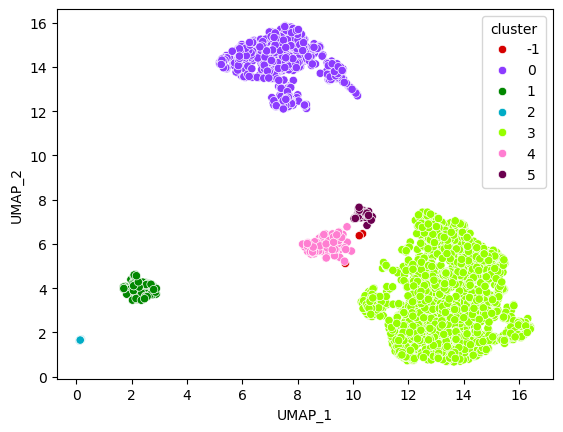

In [44]:
return_creating_cluster = creating_cluster(full_df_num,0.35,4)

In [45]:
X_scaled_df = return_creating_cluster[0]
X_umap_transformed_df = return_creating_cluster[1]
X_umap_transformed_df

,UMAP_1,UMAP_2,cluster
0,14.303771,4.649106,3
1,11.648762,1.650970,3
2,13.777379,5.405020,3
3,14.410885,3.773860,3
4,13.780991,5.655081,3
...,...,...,...
2794,12.427123,3.626530,3
2795,12.848953,4.982667,3
2796,11.584536,2.410280,3
2797,14.371529,3.085739,3


In [46]:
X_scaled_df.to_csv("X_scaled_df_UMAP_HDBSCAN.csv")
X_umap_transformed_df.to_csv("X_umap_transformed_df_UMAP_HDBSCAN.csv")

## Guessing the best value for epsilon

The 'distances' array is an 2D-array containing as many rows as points and as many columns as mins_samples (2799, 4)


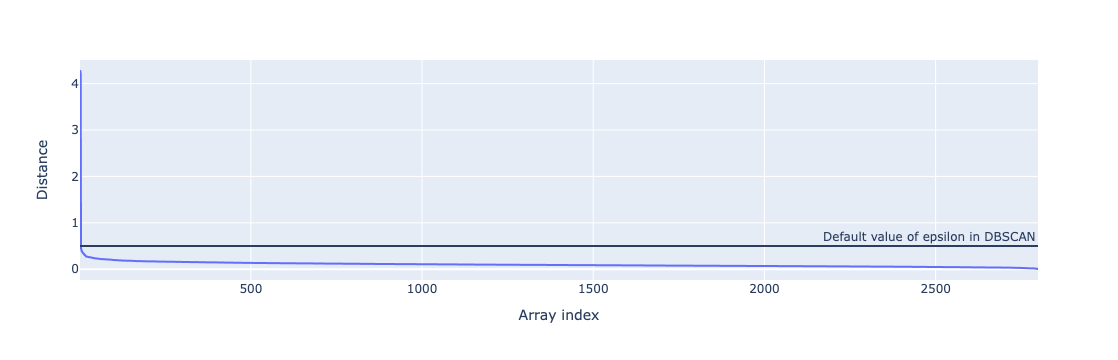

In [47]:
X_scaled_df = X_umap_transformed_df
from sklearn.neighbors import NearestNeighbors
import plotly.express as px

neighbors = 4 # The value of MinPoints or mins_samples = 2 * number_of_columns
# X_embedded is your data
nbrs = NearestNeighbors(n_neighbors=neighbors).fit(X_scaled_df)
distances, indices = nbrs.kneighbors(X_scaled_df)
print("The 'distances' array is an 2D-array containing as many rows as points and as many columns as mins_samples", distances.shape)
distance_desc = sorted(distances[:,neighbors-1], reverse=True)
fig = px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc).update_layout(
    xaxis_title="Array index", yaxis_title="Distance"
)
fig.add_hline(y=0.5, annotation_text="Default value of epsilon in DBSCAN")
fig.show()

In [48]:
kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc, # y values
                      S=1.0, #parameter suggested from paper
                      curve="convex", #parameter from figure (see https://mmerevise.co.uk/a-level-maths-revision/convex-and-concave-curves/)
                      direction="decreasing") #parameter from figure

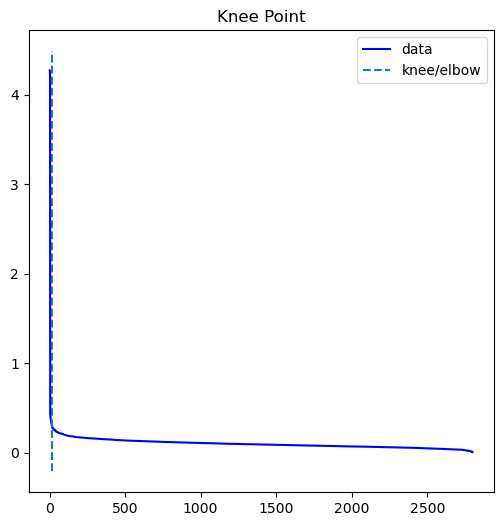

In [49]:
kneedle.plot_knee()

In [20]:
print("The epsilon value for which the distance plot has the biggest change in the slope is: {:.2f}".format(kneedle.knee_y))

The epsilon value for which the distance plot has the biggest change in the slope is: 0.25


In [ ]:
from sklearn.cluster import DBSCAN
models = {}
epsilons = []
silhouettes = []
dbcvs = []

# Epsilon values to use (including the optimal found 0.49 with the kneed library)
for value in np.arange(0.35, 0.45, 0.01):
    epsilons.append(value)
    print("Clustering with epsilon {:.2f}".format(value))
    model = DBSCAN(eps=value, min_samples=4) # min_samples = 2 * #features
    # fit model and predict clusters
    yhat = model.fit_predict(X_scaled_df.iloc[:,:2])
    X_scaled_df["dbscan_"+str(round(value,2))] = yhat

    # Scores
    print("======================================================")
    #print("Evaluating the clustering with the silhoette score...")
    print()
    sil_score =  round(silhouette_score(X_scaled_df.iloc[:,:2], yhat, metric='euclidean'),2)
    print("The silhouette score is {:.2f}".format(sil_score))
    silhouettes.append(sil_score)
    #print("Evaluating the clustering with the DBVC score...")
    #start_time = time.time()
    try:
        dbcv_score = round(DBCV(X_scaled_df.iloc[:,:2].to_numpy(), yhat, dist_function=euclidean))
        print("The DBCV score is {:.2f}".format(dbcv_score))
        dbcvs.append(dbcv_score)
    except:
        print("The DBCV score calculation failed")
        dbcvs.append(np.nan)
    print("======================================================")
    #ending_time = time.time()
    #print("The clustering evaluation with the DBCV score took {:.2f} seconds".format(ending_time-start_time))
    models["model_"+str(round(value,2))] = {"model":model,"yhat": yhat, "silhouette_score": sil_score,
                                            "DBCV_score": dbcv_score}
    print()
    print()


In [ ]:
# Replace the content of the "path" variable by "./"
file = "dbscan_models.pkl"

with open(file, "wb") as file:
    pickle.dump(models, file)

In [ ]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(epsilons, silhouettes, label="Silhouette", c="magenta")
ax[0].set_xlabel("Epsilon")
ax[0].set_ylabel("Silhouette score")
ax[0].minorticks_on()
ax[0].grid(which='both', axis='both')
ax[1].plot(epsilons, dbcvs, label="DBCV", c="blue")
ax[1].set_ylabel("DBCV score")
ax[1].set_xlabel("Epsilon")
ax[1].minorticks_on()
ax[1].grid(which='both', axis='both')
plt.tight_layout()
plt.show()